In [8]:
%%capture
!pip install -U asteroid

In [ ]:
# First clone and enter the repo
!git clone https://github.com/asteroid-team/asteroid
!cd asteroid
# Install with pip in editable mode
!pip install -e .
# Or, install with python in dev mode
# python setup.py develop

Cloning into 'asteroid'...
remote: Enumerating objects: 7818, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (286/286), done.
remote: Total 7818 (delta 207), reused 320 (delta 148), pack-reused 7376
Receiving objects: 100% (7818/7818), 6.07 MiB | 18.39 MiB/s, done.
Resolving deltas: 100% (4901/4901), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
%%capture

!gdown https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav

In [12]:
from IPython.display import display, Audio
import librosa

display(Audio("1.wav", rate=8000))
import soundfile as sf

audio, sr = librosa.load('1.wav', sr=8000)
sf.write('a.wav', audio, sr)



In [13]:
!asteroid-infer "mpariente/DPRNNTasNet-ks2_WHAM_sepclean" --files /content/a.wav
!echo "-----"
!ls

-----
160.wav  a_est1.wav  asteroid	     audio_est2.wav  a.wav
1.wav	 a_est2.wav  audio_est1.wav  audio.wav	     sample_data


In [15]:
display(Audio("a_est1.wav"))
display(Audio("a_est2.wav"))

In [11]:
display(Audio("audio_est1.wav"))
display(Audio("audio_est2.wav"))

In [ ]:
display(Audio("female-female-mixture_est1.wav"))
display(Audio("female-female-mixture_est2.wav"))

In [16]:
from asteroid.models import BaseModel
import soundfile as sf

# 'from_pretrained' automatically uses the right model class (asteroid.models.DPRNNTasNet).
model = BaseModel.from_pretrained("mpariente/DPRNNTasNet-ks2_WHAM_sepclean")

# You can pass a NumPy array:
mixture, _ = sf.read("a.wav", dtype="float32", always_2d=True)
# Soundfile returns the mixture as shape (time, channels), and Asteroid expects (batch, channels, time)
mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

# Or simply a file name:A
model.separate("a.wav")

In [17]:
display(Audio("a_est1.wav"))
display(Audio("a_est2.wav"))

In [19]:
from asteroid.models import BaseModel
import soundfile as sf

# 'from_pretrained' automatically uses the right model class (asteroid.models.DPRNNTasNet).
model = BaseModel.from_pretrained("mpariente/DPRNNTasNet-ks2_WHAM_sepclean")

# You can pass a NumPy array:
mixture, _ = sf.read("audio.wav", dtype="float32", always_2d=True)
# Soundfile returns the mixture as shape (time, channels), and Asteroid expects (batch, channels, time)
mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

# Or simply a file name:A
model.separate("audio.wav")

In [20]:
display(Audio("audio_est1.wav"))
display(Audio("audio_est2.wav"))

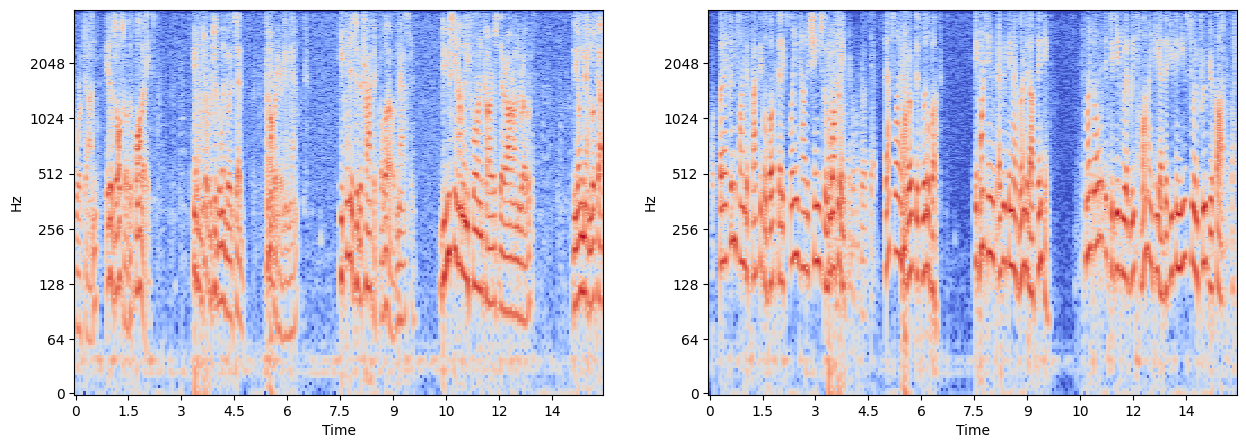

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


est1 = sf.read("a_est1.wav")[0]
est2 = sf.read("a_est2.wav")[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])